In [ ]:
#Version du code en 1D basée sur la référence SchrodingerDynamics-1.pdf

In [88]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import diags

In [94]:
#Valeurs importantes de la fonction Psi_0

x0 = 5
sigma = 0.1                     #Largeur du packet d'onde
k = 20                          #Nombre d'onde, soit 2 pi / longuer d'onde = 2 pi fréquence / vitesse
V = 0                           #Potentielle
mu = (np.pi*(w ** 2)) ** (-1/4)     #Norme de Psi à t=0

#Définition de l'intervale de propagation et du pas dx

dx = 0.01
x = np.arange(0, 10, dx)

In [97]:
#Définition de Psi_0 en 1D

Psi0 = []
for i in x:
    Psi0.append(mu*np.exp((-1/2)*((i-x0)/sigma) ** 2)*np.exp(1j*k*i))

B=[]
for j in range(0,len(Psi0)):
    B.append(np.sqrt(Psi0[j]*np.conj(Psi0[j])))

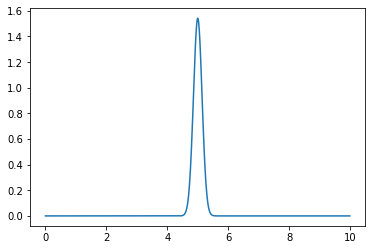

In [98]:
#Premier point de vue avec un graph 3D

plt.plot(x, np.sqrt(B).real)
plt.show()

In [99]:
#Définition des paramètres de résolution Crank-Nicholson (Diapos du cours)

#On établit le context de l'équation de Schrödinger avec un potent V(r) = 0, de sorte que d Psi/dt = D d^2 Psi/dx^2 avec D = i * hbar / 2 * m_e

D = 1j/2                                # m^2 / s, ou J s / kg,

dt = 0.0001   # 2D dt/ (dx^2) <= 1 le critère de stabilité, toujours respecté puisque D est complex. On peut choisir 
                                        # un dt quelconque. Ici, 2D dt / dx^2 = 1/2
    
alpha = 1 + D*dt/(dx ** 2)

beta = -1*D*dt/(2 * dx ** 2)

gamma = 1 - D*dt/(dx ** 2)

M = 150 #Nombre d'itérations

In [100]:
#Matrices de résolutions

A1 = diags([beta, alpha, beta], [-1,0,1], shape=(len(Psi0), len(Psi0))).toarray()   #Matrice tri-diagonale
Psi = Psi0

for l in range(0,M):                                                           #Initialisation du vecteur de seconde dérivée spatiale
    PsiX = [-2*beta*Psi[0] + gamma*Psi[1] - beta*Psi[2]]
    for i in range(1, len(Psi)-1):                                              #Toutes autres valeurs de la dérivée seconde spatiale sauf la dernière
        PsiX.append(-1*beta*(Psi[i-1]+Psi[i+1]) + gamma*Psi[i])
    PsiX.append(-2*beta*Psi[len(Psi)-1] + gamma*Psi[len(Psi)-2] - beta*Psi[len(Psi)-3])      #Dernière ligne du vecteur de seconde dérivée spatiale
    Psi = np.linalg.solve(A1,PsiX)                                              #Calcule de la fonction Psi au temps 0 + l*dt   

In [101]:
#Fonction de probabilité de présence selon la méthode Crank-Nicholson
C=[]
for m in range(0,len(Psi)):
    C.append(Psi[m]*np.conj(Psi[m]))

In [102]:
#Solution analytique selon la référence [http://www.m-hikari.com/astp/astp2013/astp5-8-2013/zeccaASTP5-8-2013.pdf]

a = np.sqrt(sigma**2 - 1j*M*dt) #Constant importante en fonction de sigma et de t

E=[]
for n in x:
    E.append(((a/(np.sqrt(np.pi)*(1+1j*M*dt*a**2)))**(1/2))*np.exp((-1*(a ** 2)/(2*(1+1j*M*dt*a**2)))*((n-(r0+ k*M*dt))/w)**2)*np.exp(1j*k*n))

F=[]
for p in range(0,len(E)):
    F.append(np.sqrt(E[p]*np.conj(E[p])))

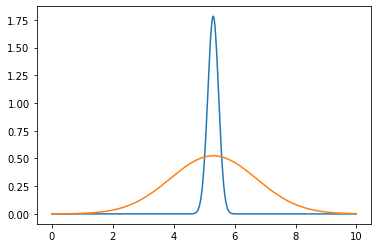

In [103]:
#Comparaison solution de la méthode (bleu) avec la solution analytique (orange)

plt.plot(x, np.sqrt(C).real, x, np.sqrt(F).real)
plt.show()